In [35]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [36]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [37]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')

#next 3 variables not needed in Sandbox
#PLAID_SECRET = os.getenv('PLAID_SECRET')
#PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
#PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')
type(PLAID_CLIENT_ID)

str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [38]:
INSTITUTION_ID = "ins_109508"

In [39]:
client = plaid.Client(
    client_id=PLAID_CLIENT_ID, 
    secret=PLAID_SBX_SECRET_KEY, 
    public_key=PLAID_PUBLIC_KEY,
    environment='sandbox')
client.Institutions.get(2)

{'institutions': [{'country_codes': ['CA'],
   'credentials': [{'label': 'Login ID', 'name': 'username', 'type': 'text'},
    {'label': 'Access Code (PAC)', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_118841',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Access Credit Union - Online Banking',
   'products': ['assets', 'balance', 'transactions', 'income', 'identity'],
   'routing_numbers': []},
  {'country_codes': ['GB'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_119371',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': 'Aegon (Online Services)',
   'products': ['investments'],
   'routing_numbers': []}],
 'request_id': 'jzUsM4g6BuqqWLX',
 'total

### 2. Generate a public token

In [40]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income'])

### 3. Exchange the public token for an access token

In [41]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [42]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': '5rzvQbJrdvsQWbzwr7kzFWLK9BBejgSZoEPyA',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'J8dMrxQ8nMhWgeLdAPMLFqWZ833rQasdEGrMq',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'kGX7KDpGn7HRlQB9oEeBFL8wd44q3McWB3VDd',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [44]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
pretty_print_response(transaction_response["transactions"][1])

{
    "account_id": "5rzvQbJrdvsQWbzwr7kzFWLK9BBejgSZoEPyA",
    "account_owner": null,
    "amount": 6.33,
    "authorized_date": null,
    "category": [
        "Travel",
        "Taxi"
    ],
    "category_id": "22016000",
    "date": "2020-01-29",
    "iso_currency_code": "USD",
    "location": {
        "address": null,
        "city": null,
        "country": null,
        "lat": null,
        "lon": null,
        "postal_code": null,
        "region": null,
        "store_number": null
    },
    "name": "Uber",
    "payment_channel": "in store",
    "payment_meta": {
        "by_order_of": null,
        "payee": null,
        "payer": null,
        "payment_method": null,
        "payment_processor": null,
        "ppd_id": null,
        "reason": null,
        "reference_number": null
    },
    "pending": false,
    "pending_transaction_id": null,
    "transaction_id": "1GrbkVLGzbHdjJGrNeQGcpDm49kzLrf5pbZBB",
    "transaction_type": "special",
    "unofficial_currency_code": 

### 2. Print the categories for each transaction

In [45]:
# YOUR CODE HERE
# There are two ways to print: 
# method 1. loop through each item.  This is more flexible to take out first item of category list.
for transaction in transaction_response["transactions"]:
    print(transaction["transaction_type"] + ":", end =" "), print(transaction["category"][0]) 

special: Travel
special: Travel
place: Food and Drink
special: Payment
place: Food and Drink
place: Shops
special: Payment
special: Travel
special: Transfer
special: Transfer
place: Recreation
special: Travel
place: Food and Drink
place: Food and Drink
place: Food and Drink
special: Transfer
special: Travel
special: Travel
place: Food and Drink
special: Payment
place: Food and Drink
place: Shops
special: Payment
special: Travel
special: Transfer
special: Transfer
place: Recreation
special: Travel
place: Food and Drink
place: Food and Drink
place: Food and Drink
special: Transfer
special: Travel
special: Travel
place: Food and Drink
special: Payment
place: Food and Drink
place: Shops
special: Payment
special: Travel
special: Transfer
special: Transfer
place: Recreation
special: Travel
place: Food and Drink
place: Food and Drink
place: Food and Drink
special: Transfer
special: Travel


In [46]:
# method 2. tranform to DataFrame. This is faster if data is clean.
transactions = pd.DataFrame.from_dict(transaction_response["transactions"])
print(transactions[['transaction_type','category']])

   transaction_type                                    category
0           special    [Travel, Airlines and Aviation Services]
1           special                              [Travel, Taxi]
2             place               [Food and Drink, Restaurants]
3           special                                   [Payment]
4             place    [Food and Drink, Restaurants, Fast Food]
5             place                     [Shops, Sporting Goods]
6           special                      [Payment, Credit Card]
7           special                              [Travel, Taxi]
8           special                           [Transfer, Debit]
9           special                         [Transfer, Deposit]
10            place      [Recreation, Gyms and Fitness Centers]
11          special    [Travel, Airlines and Aviation Services]
12            place    [Food and Drink, Restaurants, Fast Food]
13            place  [Food and Drink, Restaurants, Coffee Shop]
14            place               [Food 

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [47]:
# YOUR CODE HERE
records = []
for transaction in transaction_response["transactions"]:
    record = {}
    record.update({'date':transaction['date'],
                   'name':transaction['name'],
                   'amount':transaction['amount'],
                   'category':transaction['category'][0]})
    records.append(record) # records is a list of dicts, which can be transformed to DataFrame in next step.
df = pd.DataFrame.from_dict(records)
df.head()

,date,name,amount,category
0,2020-01-31,United Airlines,500.00,Travel
1,2020-01-29,Uber,6.33,Travel
2,2020-01-26,Tectra Inc,500.00,Food and Drink
3,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2020-01-25,KFC,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [48]:
# YOUR CODE HERE
df.astype({'amount': float})
df['date'] = pd.to_datetime(df['date'])
df2 = df.set_index('date')
df2.head()

,name,amount,category
date,,,
2020-01-31,United Airlines,500.00,Travel
2020-01-29,Uber,6.33,Travel
2020-01-26,Tectra Inc,500.00,Food and Drink
2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-01-25,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [49]:
# YOUR CODE HERE
income_response = client.Income.get(access_token)
pretty_print_response(income_response["income"])

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 690,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6000,
    "last_year_income_before_tax": 7285,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [50]:
print(f"Previous year's gross income is ${income_response['income']['last_year_income_before_tax']}.")
print(f"Current month income is ${income_response['income']['income_streams'][0]['monthly_income']}.")
print(f"Projected yearly income is ${income_response['income']['projected_yearly_income']}.")

Previous year's gross income is $7285.
Current month income is $500.
Projected yearly income is $6085.


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [51]:
# YOUR CODE HERE
cat_spending = df2[['category','amount']].groupby(by='category').sum()
cat_spending.rename(columns = {'amount':'Total Spending'}, inplace = True)
cat_transaction = df2[['category','amount']].groupby(by='category').count()
cat_transaction.rename(columns = {'amount':'# of Transactions'}, inplace = True)
cat=pd.concat((cat_spending,cat_transaction),axis = 1, join = 'inner')
cat

,Total Spending,# of Transactions
category,,
Food and Drink,3317.19,15
Payment,6310.50,6
Recreation,235.50,3
Shops,1500.00,3
Transfer,20537.34,9
Travel,535.19,13


In [52]:
import hvplot.pandas
cat['# of Transactions'].hvplot(kind = 'bar', title = '# of Transactions by Category')

:Bars   [category]   (# of Transactions)

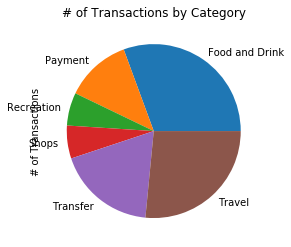

In [53]:
cat['# of Transactions'].plot(kind = 'pie', title = '# of Transactions by Category')

### Calculate the expenses per month

In [54]:
# YOUR CODE HERE
per = df2.index.to_period("M")
monthly_expense = df2.groupby(per).sum()
monthly_expense

,amount
date,
2019-11,10645.24
2019-12,10645.24
2020-01,11145.24


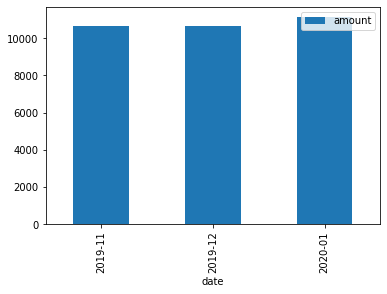

In [55]:
monthly_expense.plot(kind = 'bar')